In [5]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [23]:
psw_original = pd.read_excel("PSWDataConsolidated22.xlsx")



PermissionError: [Errno 13] Permission denied: 'PSWDataConsolidated22.xlsx'

In [19]:
extract = pd.read_excel("22eoextract990.xlsx")



In [20]:
ext = extract.copy()

In [21]:
psw = psw_original.copy()

NameError: name 'psw_original' is not defined

In [24]:
print(psw.shape)
print(psw.head())

(15522, 67)
                     transaction_id  grantmaker_id grantmaker_canonical_id  \
0  990-transaction-domestic-5387228        6994475                     NaN   
1  990-transaction-domestic-5702251        8277630                     NaN   
2  990-transaction-domestic-5775608        9699334                     NaN   
3  990-transaction-domestic-5831018        7169052                     NaN   
4  990-transaction-domestic-5903083       14586220                     NaN   

  legacy_gm_key     gm_ein  gm_associated_ein_flag  \
0       6838277  201045427                     NaN   
1       CARD111  860653587                     NaN   
2           NaN  824800977                     NaN   
3       KIVE003  237157268                     NaN   
4           NaN  873085883                     NaN   

                             gm_name   gm_city gm_state gm_county  ...  \
0  Prescott Sunrise Lions Foundation  Prescott       AZ   Yavapai  ...   
1             Cardinal Charities Inc   Phoenix

In [37]:
print(ext.shape)
print(ext.head())

(326123, 246)
  efile      gm_ein    tax_pd  subseccd s501c3or4947a1cd schdbind  \
0     P  10018922.0  202004.0      19.0                N        N   
1     E  10018922.0  202104.0      19.0                N        N   
2     E  10018922.0  202204.0      19.0                N        N   
3     E  10018923.0  202105.0      19.0                N        N   
4     E  10018923.0  202205.0      19.0                N        N   

  politicalactvtscd lbbyingactvtscd subjto6033cd dnradvisedfundscd  ...  \
0                 N             NaN            N                 N  ...   
1                 N             NaN            N                 N  ...   
2                 N             NaN            N                 N  ...   
3                 N             NaN            N                 N  ...   
4                 N             NaN            N                 N  ...   

  exceeds1pct509 subtotpub509 pubsupplesub509 samepubsuppsubtot509 grsinc509  \
0            0.0          0.0           

In [27]:
psw['gm_ein'] = psw['gm_ein'].str.replace('-', '', regex = False)
ext.rename(columns={'EIN': 'gm_ein'}, inplace=True)

In [29]:
psw = psw[['gm_ein', 'gm_name', 'gm_city', 'gm_state', 'gm_county', 'gm_postal_code', 'gm_country', 'gm_cbsa', 'gm_cong_dist', 'gm_organization_tran', 'gm_family_fdn_flag',
'recip_ein', 'recip_name', 'recip_city', 'recip_state', 'recip_county', 'recip_postal_code', 'recip_country', 'recip_cbsa', 'recip_cong_dist','recip_organization_tran',
'recip_subject_code', 'recip_subject_tran', 'recip_population_code', 'recip_population_tran', 'recip_support_code', 'recip_support_tran', 'internal_transaction',
'amount_usd', 'fiscal_year', 'duration', 'program_area', 'grant_title', 'description', 'grant_subject_tran', 'grant_population_tran', 'grant_support_tran',
'domestic_foreign_flag', 'intl_regions', 'intl_countries', 'dom_states_tran']]

In [66]:
psw.drop_duplicates(inplace=True)
ext.drop_duplicates(inplace=True)


C:\Users\archi\AppData\Local\Temp\ipykernel_32872\2881092956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psw.drop_duplicates(inplace=True)


In [70]:
print(psw.shape)

(12424, 41)


In [67]:
# psw['gm_ein'] = psw['gm_ein'].astype(str)
# ext['gm_ein'] = ext['gm_ein'].astype(str)

psw['gm_ein'] = pd.to_numeric(psw['gm_ein'], errors='coerce').fillna(0).astype(int)
ext['gm_ein'] = pd.to_numeric(ext['gm_ein'], errors='coerce').fillna(0).astype(int)

C:\Users\archi\AppData\Local\Temp\ipykernel_32872\1341669334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psw['gm_ein'] = pd.to_numeric(psw['gm_ein'], errors='coerce').fillna(0).astype(int)


In [68]:
comb = pd.merge(psw, ext, on='gm_ein', how='left')

In [61]:
print(comb.head())

      gm_ein                            gm_name   gm_city gm_state gm_county  \
0  201045427  Prescott Sunrise Lions Foundation  Prescott       AZ   Yavapai   
1  201045427  Prescott Sunrise Lions Foundation  Prescott       AZ   Yavapai   
2  860653587             Cardinal Charities Inc   Phoenix       AZ  Maricopa   
3  824800977              Feeding Gods Children    Peoria       AZ  Maricopa   
4  237157268               Kivel Campus of Care   Phoenix       AZ  Maricopa   

  gm_postal_code     gm_country                      gm_cbsa  gm_cong_dist  \
0     86302-0985  United States                          NaN         404.0   
1     86302-0985  United States                          NaN         404.0   
2     85001-0888  United States  Phoenix-Mesa-Scottsdale, AZ         406.0   
3     85382-1421  United States  Phoenix-Mesa-Scottsdale, AZ         408.0   
4     85018-6998  United States  Phoenix-Mesa-Scottsdale, AZ         409.0   

                    gm_organization_tran  ... exce

In [69]:
print(comb.shape)

(12491, 286)


In [55]:
print(psw['gm_ein'][0])
# print(psw.loc[psw['gm_ein'] == 510192519])
print(ext.loc[ext['gm_ein'] == 510192519])

201045427
       efile     gm_ein    tax_pd  subseccd s501c3or4947a1cd schdbind  \
185639     E  510192519  202106.0       3.0                Y        Y   

       politicalactvtscd lbbyingactvtscd subjto6033cd dnradvisedfundscd  ...  \
185639                 N               Y            N                 N  ...   

       exceeds1pct509 subtotpub509 pubsupplesub509 samepubsuppsubtot509  \
185639            0.0          0.0             0.0                  0.0   

       grsinc509 unreltxincls511tx509 subtotsuppinc509 netincunrelatd509  \
185639       0.0                  0.0              0.0               0.0   

       othrinc509 totsupp509  
185639        0.0        0.0  

[1 rows x 246 columns]


In [65]:
comb.to_csv('comb.csv')

In [4]:
comb = pd.read_csv('candid_irs_comb.csv')

C:\Users\archi\AppData\Local\Temp\ipykernel_23492\1846778314.py:1: DtypeWarning: Columns (28,32,54,77,78,79,86,107,118,125,127) have mixed types. Specify dtype option on import or set low_memory=False.
  comb = pd.read_csv('candid_irs_comb.csv')


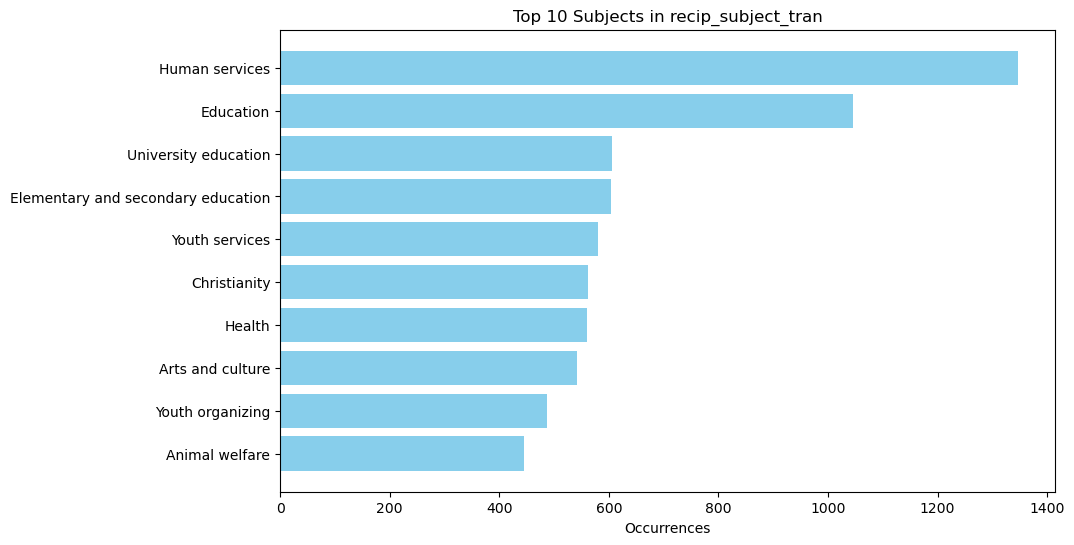

In [7]:
all_subjects = comb['recip_subject_tran'].fillna('').str.split('; ').explode()

all_subjects = all_subjects[all_subjects != '']

subject_counts = Counter(all_subjects)

top_10_subjects = subject_counts.most_common(10)

top_10_df = pd.DataFrame(top_10_subjects, columns=['Subject', 'Count'])

plt.figure(figsize=(10, 6))
plt.barh(top_10_df['Subject'], top_10_df['Count'], color='skyblue')
plt.xlabel('Occurrences')
plt.title('Top 10 Subjects in recip_subject_tran')
plt.gca().invert_yaxis()
plt.show()

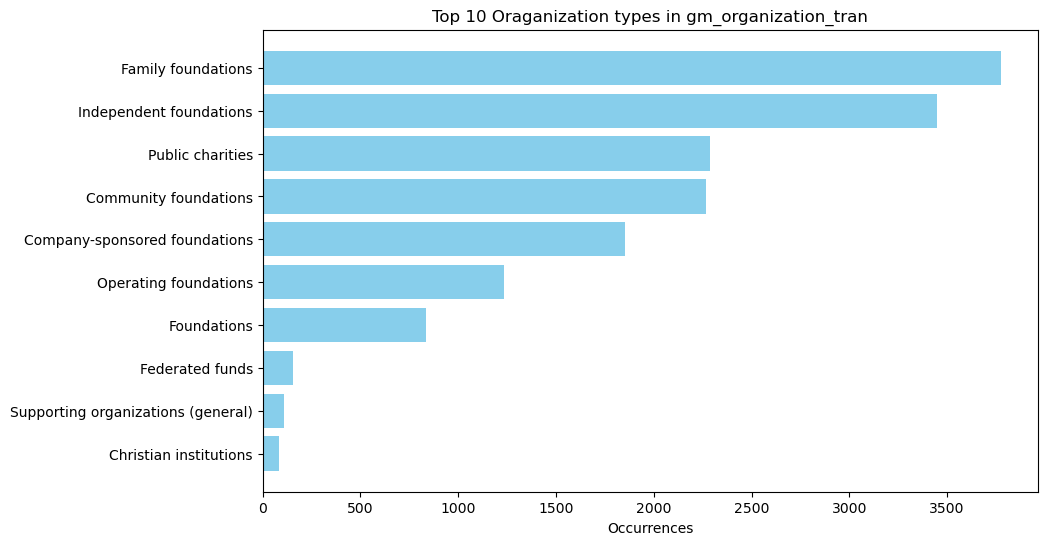

In [8]:

all_org = comb['gm_organization_tran'].fillna('').str.split('; ').explode()

all_org = all_org[all_org != '']

org_counts = Counter(all_org)

top_10_orgs = org_counts.most_common(10)

top_10_org_df = pd.DataFrame(top_10_orgs, columns=['Organization', 'Count'])

plt.figure(figsize=(10, 6))
plt.barh(top_10_org_df['Organization'], top_10_org_df['Count'], color='skyblue')
plt.xlabel('Occurrences')
plt.title('Top 10 Oraganization types in gm_organization_tran')
plt.gca().invert_yaxis()
plt.show()

C:\Users\archi\AppData\Local\Temp\ipykernel_23492\3023747163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['amount_usd'] = pd.to_numeric(filtered_df['amount_usd'], errors='coerce')


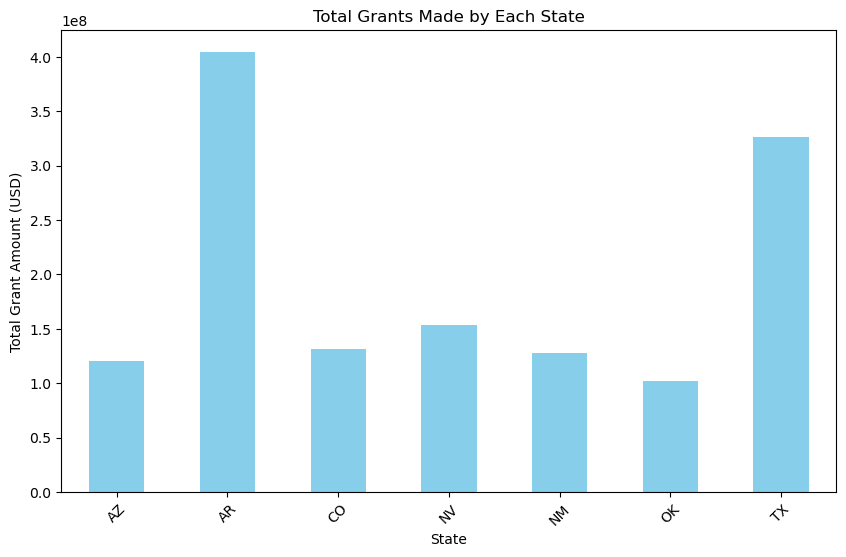

In [9]:
filtered_df = comb.dropna(subset=['gm_state', 'amount_usd'])
filtered_df['amount_usd'] = pd.to_numeric(filtered_df['amount_usd'], errors='coerce')

state_grants = filtered_df.groupby('gm_state')['amount_usd'].sum().reindex(['AZ', 'AR', 'CO', 'NV', 'NM', 'OK', 'TX'], fill_value=0)

plt.figure(figsize=(10, 6))
state_grants.plot(kind='bar', color='skyblue')

plt.xlabel('State')
plt.ylabel('Total Grant Amount (USD)')
plt.title('Total Grants Made by Each State')
plt.xticks(rotation=45)
plt.show()